## Autoencoder für die Reihenfolge:

In [1]:
from Variational_Autoencoder_alla_Valerio import VAE
import numpy as np
import matplotlib.pyplot as plt

### Input Data:
We load the array with all song_orders. We need to bring them all to the same size, so we can use them as training data

In [24]:
subfolder = "0.25_16"
model_name = "Valerio_512"
song_orders = np.load("data_and_models\\" + subfolder + "\\" + model_name +"drum_song_orders.npy", allow_pickle=True)

In [25]:
song_orders[1].shape

(32, 2)

In [27]:
max_song_length = 0
'''
for i in range(0, len(song_orders)):
    if len(song_orders[i]) > max_song_length:
        max_song_length = len(song_orders[i])
        if not (max_song_length % 2) == 0: #increase max_song_length to even number. This is crutial for the Shape of Autoencoder input data.
            max_song_length += 1       
print(max_song_length)
'''
max_song_length = 34
x_train = []
for order in song_orders:
    if order.shape[0] < max_song_length:
        padded_order = np.pad(order,((0,max_song_length-order.shape[0]),(0,0)), constant_values=(0,0))
        x_train.append(padded_order)
x_train = np.asarray(x_train)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2], 1)
x_train.shape

(16, 34, 2, 1)

### Build the model
We can build a new model

In [28]:
autoencoder = VAE(
    input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
    conv_filters=(32, 64, 64, 64),
    conv_kernels=(3, 3, 3, 3),
    conv_strides=(1, 1, 2, 1),
    latent_space_dim=2
)
#autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.


In [41]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 1
EPOCHS = 15

autoencoder.compile_model(LEARNING_RATE)
autoencoder.train(x_train, BATCH_SIZE, EPOCHS)

Train on 16 samples
Epoch 1/15
16/16 [==============================] - 1s 5ms/sample - loss: 10776716.2500 - calculate_reconstruction_loss: 10.7767
Epoch 2/15
16/16 [==============================] - 0s 5ms/sample - loss: 10776337.5625 - calculate_reconstruction_loss: 10.7763
Epoch 3/15
16/16 [==============================] - 0s 6ms/sample - loss: 10776064.0000 - calculate_reconstruction_loss: 10.7760
Epoch 4/15
16/16 [==============================] - 0s 5ms/sample - loss: 10775535.5625 - calculate_reconstruction_loss: 10.7755
Epoch 5/15
16/16 [==============================] - 0s 5ms/sample - loss: 10775535.8750 - calculate_reconstruction_loss: 10.7755
Epoch 6/15
16/16 [==============================] - 0s 5ms/sample - loss: 10775535.6250 - calculate_reconstruction_loss: 10.7755
Epoch 7/15
16/16 [==============================] - 0s 6ms/sample - loss: 10775535.3125 - calculate_reconstruction_loss: 10.7755
Epoch 8/15
16/16 [==============================] - 0s 6ms/sample - loss: 107

In [30]:
autoencoder.save("Autoencoder_SongOrders" + str(autoencoder.latent_space_dim) + "D_" + subfolder)


# Check Results
Check how good the autoencoder is in reconstructing a song order.

In [42]:
song_num = 0
latent_representation = autoencoder.encoder.predict(x_train)
reconstructed_data = autoencoder.decoder.predict(latent_representation)

In [43]:
reconstructed_data.shape

(16, 34, 2, 1)

This is the original


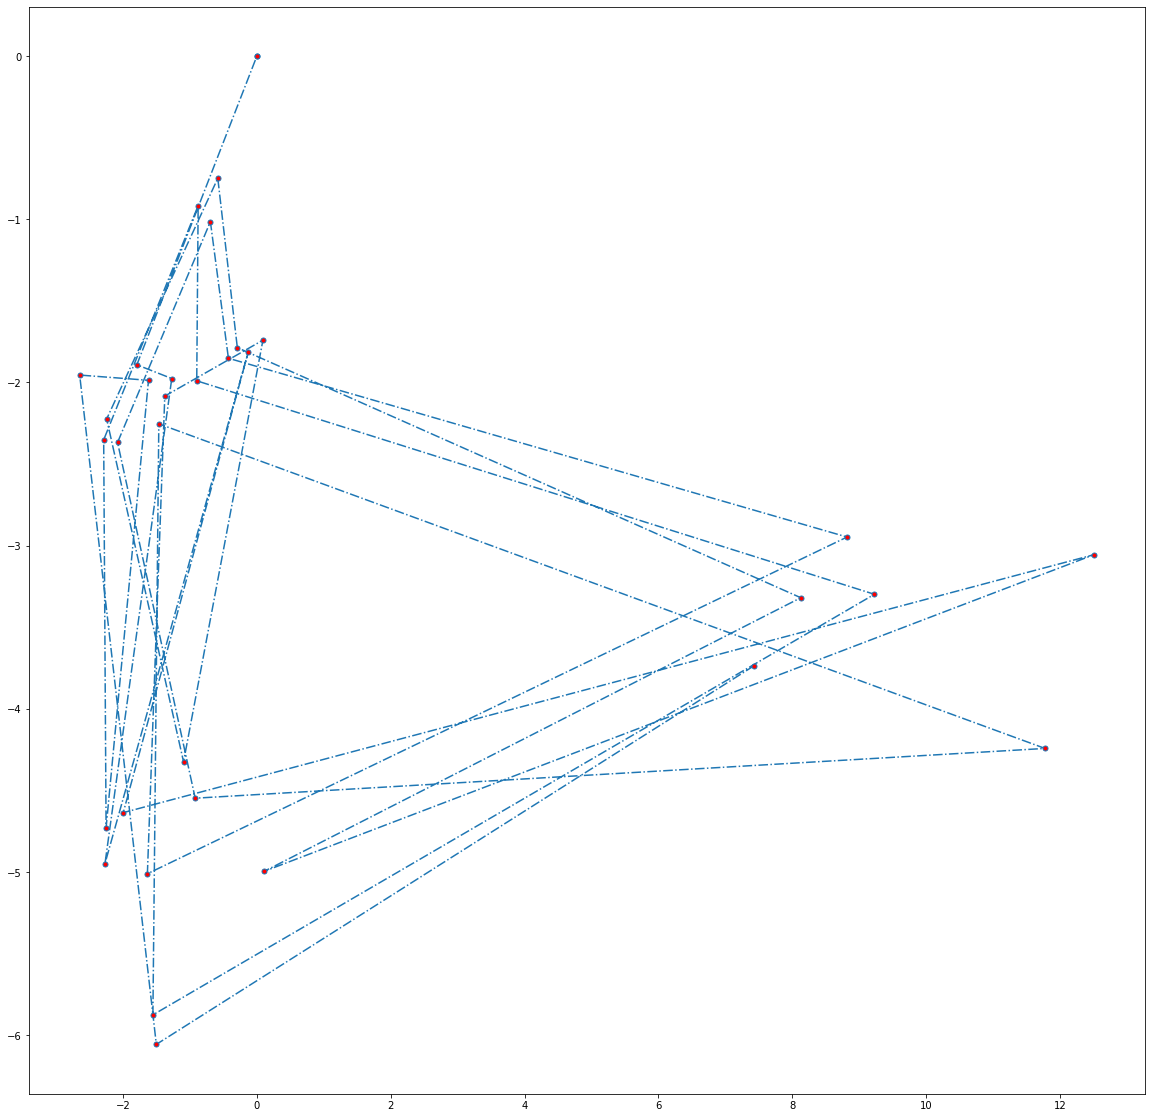

In [44]:
print("This is the original")
plt.figure(figsize=(20,20))
plt.plot(x_train[song_num][:, 0], x_train[song_num][:, 1], '-.o', markersize=5, markerfacecolor='red')
plt.show()

This is the reconstruction


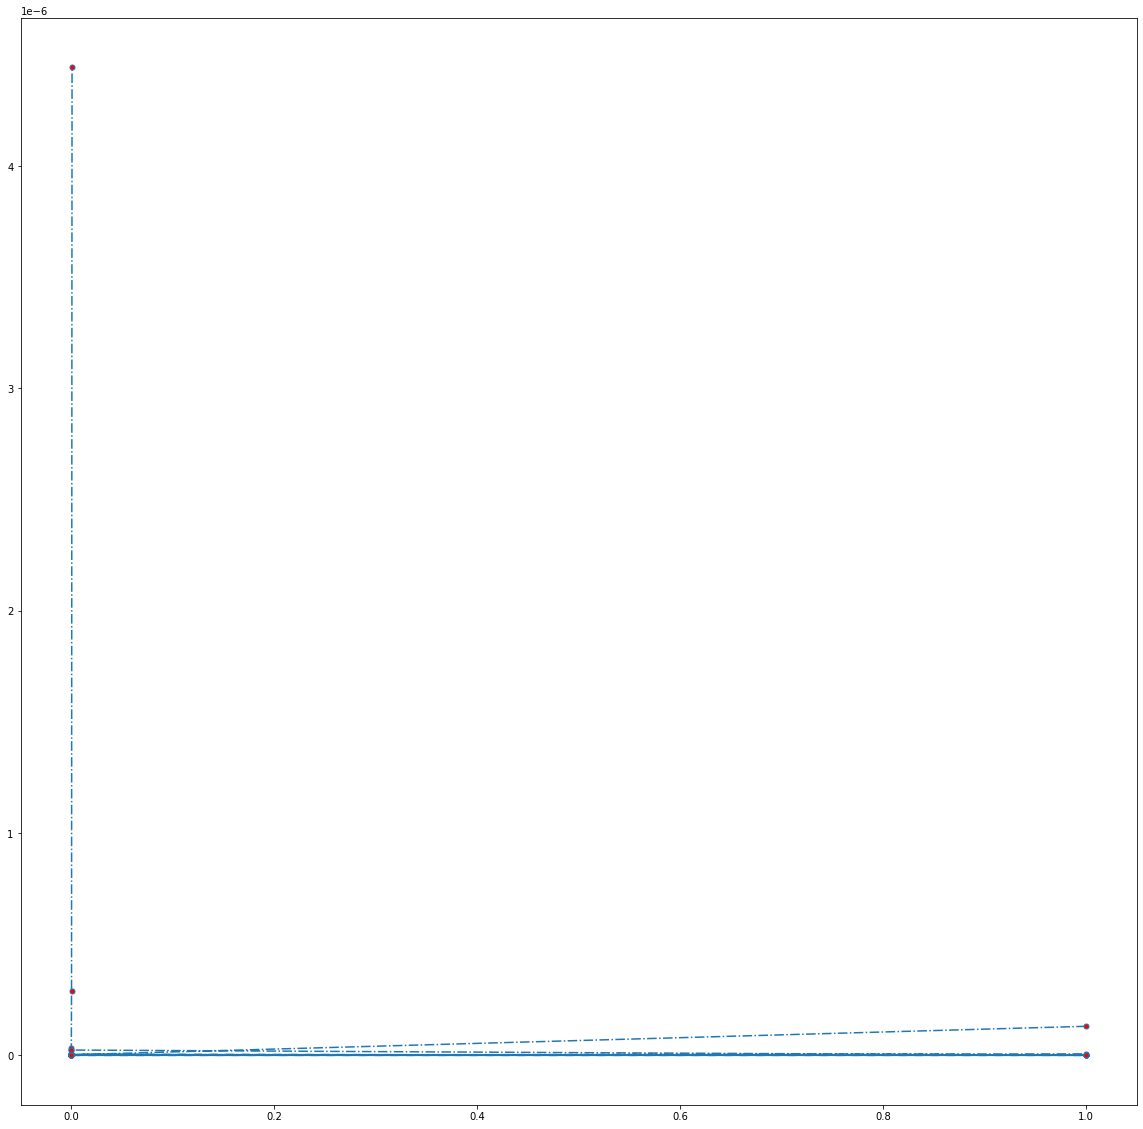

In [45]:
print("This is the reconstruction")
plt.figure(figsize=(20,20))
plt.plot(reconstructed_data[song_num][:, 0], reconstructed_data[song_num][:, 1], '-.o', markersize=5, markerfacecolor='red')
plt.show()